In [3]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import *
from scipy.stats import *
from sklearn.metrics import mean_squared_error as msq
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
# Считывание данных.
data = pd.read_csv("../6/6.csv.xls", header=None)
data.columns = ['y']
lamb = 105
t_0 = 500
t = 110000

In [20]:
data[:5]

,y
0,0.0000
1,198.4406
2,460.8092
3,494.1672
4,517.8483


In [56]:
# Сопряженное распределение - гамма
def bayes(sample, x1, x2):
    return (x1 + len(sample)) * 1.0 / (x2 + sum(sample))

In [6]:
# Посчитаем разности времен выхода из строя соседних
samples = []
for i in range(len(data)-1):
    samples += [data.ix[i+1] - data.ix[i]]
s = []
for i in samples:
    s += [float(i)]

In [57]:
# Реальное значение параметра
real_lamb = 1.0 / lamb

In [58]:
# Подбор параметров сопряженного распределения
best_x1 = 0
best_x2 = 0
best = 1000
for i in range(1, 100):
    for j in range(1, 100):
        tmp = abs(bayes(s, i, j)- real_lamb)
        if tmp < best:
            best = tmp
            best_x1 = i
            best_x2 = j
        

In [53]:
# Оценки числа сломанных серверов
time = []
arr = []
for i in range(t/t_0):
    time += [i * t_0]
    arr += [len(data[data.y < i * t_0]) + (t - i * t_0) * bayes(s[:len(data[data.y < i * t_0])], best_x1, best_x2)]

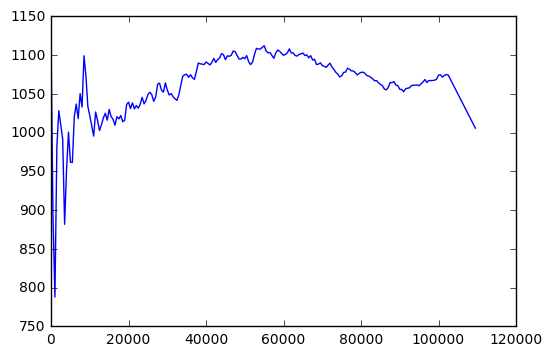

In [54]:
plt.plot(time, arr)
plt.show()

In [59]:
for i in arr:
    print i

1111.11111111
891.576410602
787.896757887
982.274335233
1028.33442759
1009.80553035
992.081166515
881.780054869
952.191037073
1000.70673726
961.907328144
961.649105785
1020.86628345
1036.92445849
1018.17211769
1050.3352065
1033.1763517
1099.28292556
1073.24075711
1033.64048472
1021.95553616
1008.80924161
995.595716611
1026.70550292
1015.64617986
1002.79449281
1010.22961914
1019.10039995
1025.03863546
1016.15440738
1030.01302999
1020.72895877
1017.28760708
1009.63803362
1020.65475675
1017.83749828
1022.09811773
1014.14488277
1015.85260642
1036.26740111
1039.37115134
1031.06356414
1038.5103225
1030.86103394
1035.06110154
1031.57233863
1036.65105407
1045.5960727
1037.25524292
1041.6512329
1049.44921388
1052.27631847
1048.98449557
1040.47348279
1046.02713588
1062.51164817
1063.91729752
1054.79851513
1052.29386312
1064.29710103
1055.0064836
1048.66301498
1050.45870286
1046.27632638
1043.67600251
1041.71084711
1049.30803097
1061.56369053
1073.03652158
1074.85996629
1075.34587449
1071.4051776

# Вывод
Сначала в оценке был сильный разброс, что понятно, ведь не было никакой информации. На последних шагах оцценка числа сломанных серверов стала наиболее близкой к реальному знгачению